# Exercise 3

Exercise 3 was the most diffcicult one for me, but I ended up with a concise and efficient code which I am very happy with.
First of all we download the html code from the website using the requests libvrary and get() function. We store the raw html code in the html string. It will be translated to just characters and transferred to the content string.

In [5]:
import requests
import re
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas
from collections import Counter

link = "https://blog.keras.io/the-future-of-deep-learning.html"

html = requests.get(link).text
content = ''
is_html_code = 0

print(html)

<!DOCTYPE html>
<html lang="en">
<head>
        <title>The future of deep learning</title>
        <meta charset="utf-8" />
        <link rel="stylesheet" href="//blog.keras.io/theme/css/main.css" type="text/css" />
        <link rel="stylesheet" href="//blog.keras.io/theme/css/pygment.css" type="text/css" />

        <link href="https://fonts.googleapis.com/css?family=Lato:400,700|Source+Sans+Pro:400,700|Inconsolata:400,700" rel="stylesheet" type="text/css">
        <link href="//blog.keras.io/" type="application/atom+xml" rel="alternate" title="The Keras Blog ATOM Feed" />


        <!--[if IE]>
                <script src="http://html5shiv.googlecode.com/svn/trunk/html5.js"></script><![endif]-->

        <!--[if lte IE 7]>
                <link rel="stylesheet" type="text/css" media="all" href="//blog.keras.io/css/ie.css"/>
                <script src="//blog.keras.io/js/IE8.js" type="text/javascript"></script><![endif]-->

        <!--[if lt IE 7]>
                <link rel="styles

Stripping the string form unnecessary characters and HTML code was challenging. I ended up creating a loop which ignores everything between the <> brackets, operating kind of like a state/machine. The < character switches the 'is_html_code' variable into 1 which blocks registration of new characters until the closing bracket has arrived. The registration method uses an isalpha() funtion to filter out any non-alpha characters.

In [6]:
for character in html:
    if character is '<':
        is_html_code = 1
    if is_html_code is 0 and character.isalpha():
        content = content + character.lower()
    if character is '>':
        is_html_code = 0

print(content)

thefutureofdeeplearningthekerasblogkerasisadeeplearninglibraryforpythonthatissimplemodularandextensiblearchivesgithubdocumentationgooglegroupthefutureofdeeplearningtuejulybyfrancoischolletinessaysthispostisadaptedfromsectionofchapterofmybookdeeplearningwithpythonmanningpublicationsitispartofaseriesoftwopostsonthecurrentlimitationsofdeeplearninganditsfutureyoucanreadthefirstpartherethelimitationsofdeeplearninggivenwhatweknowofhowdeepnetsworkoftheirlimitationsandofthecurrentstateoftheresearchlandscapecanwepredictwherethingsareheadedinthemediumtermherearesomepurelypersonalthoughtsnotethatidonthaveacrystalballsoalotofwhatianticipatemightfailtobecomerealitythisisacompletelyspeculativepostiamsharingthesepredictionsnotbecauseiexpectthemtobeprovencompletelyrightinthefuturebutbecausetheyareinterestingandactionableinthepresentatahighlevelthemaindirectionsinwhichiseepromisearemodelsclosertogeneralpurposecomputerprogramsbuiltontopoffarricherprimitivesthanourcurrentdifferentiablelayersâthisishowwew

With the Counter function form collections, it was very easy to count every letter in the stripped string. Pandas' DataFrame helps a lot here, I was able to make a histogram with the correct labels very quickly and easily.

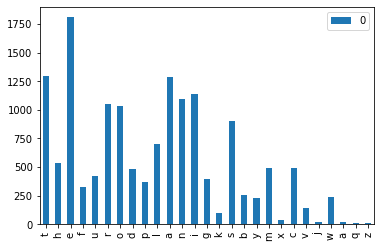

In [7]:
letter_count = Counter(content)
data = pandas.DataFrame.from_dict(letter_count, orient='index')
data.plot(kind='bar')

plt.show()